In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import string as st


In [2]:
## Load dataset
train_df = pd.read_excel(r"C:\Users\saras\Documents\School\CAP5610-Machine learning\datasets\drugs_train.xlsx")
test_df = pd.read_excel(r"C:\Users\saras\Documents\School\CAP5610-Machine learning\datasets\drugs_test.xlsx")

In [3]:
## download all nltk packages
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\saras\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\saras\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\saras\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\saras\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\saras\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

### EDA

In [4]:
# Top 5 rows
train_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37


In [5]:
test_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,2009-05-17,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,2017-09-29,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,2017-03-05,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,2015-10-22,4


In [6]:
# last five rows
train_df.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,2015-05-31,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,2011-11-01,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,2014-03-15,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,2015-09-19,79
161296,215220,Lubiprostone,"Constipation, Chronic","""I&#039;ve had chronic constipation all my adu...",9,2014-12-13,116


In [7]:
## Missing values 
train_df.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [8]:
# Summary Stats
train_df.describe()

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [9]:

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   uniqueID     161297 non-null  int64         
 1   drugName     161297 non-null  object        
 2   condition    160398 non-null  object        
 3   review       161297 non-null  object        
 4   rating       161297 non-null  int64         
 5   date         161297 non-null  datetime64[ns]
 6   usefulCount  161297 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 8.6+ MB


In [10]:
#no of drugs
train_df.drugName.nunique()

3436

In [11]:
## Most popular drug
train_df.drugName.value_counts().nlargest(10)

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Name: drugName, dtype: int64

In [12]:
#no of patient conditions
train_df.condition.nunique()

884

In [13]:
train_df.condition.value_counts().nlargest(10)

Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: condition, dtype: int64

In [14]:
train_df.groupby('condition')['drugName'].nunique().nlargest(10)

condition
Not Listed / Othe       214
Pain                    200
Birth Control           172
High Blood Pressure     140
Acne                    117
Depression              105
Rheumatoid Arthritis     98
Diabetes, Type 2         89
Allergic Rhinitis        88
Bipolar Disorde          80
Name: drugName, dtype: int64

In [15]:
train_df.groupby('rating')['uniqueID'].count()

rating
1     21619
2      6931
3      6513
4      5012
5      8013
6      6343
7      9456
8     18890
9     27531
10    50989
Name: uniqueID, dtype: int64

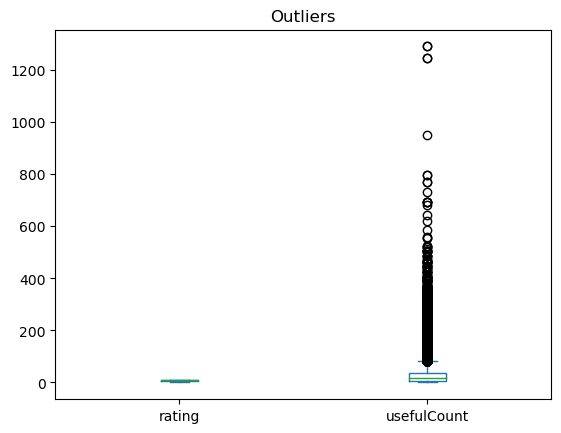

In [3]:
#Identify outliers using boxplot
train_df[['rating','usefulCount']].plot(kind='box')
plt.title('Outliers')
plt.show()

C:\Users\saras\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


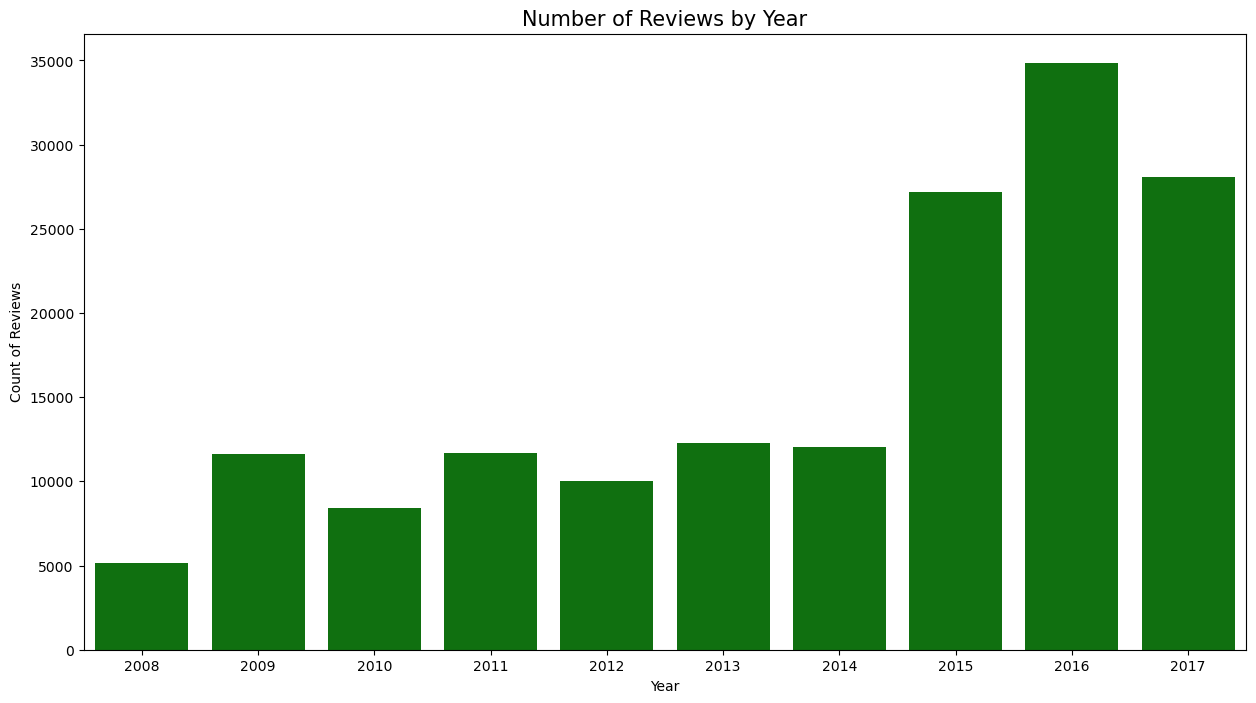

In [4]:
train_df['date'] = pd.to_datetime(train_df['date'], errors = 'coerce')

# now extracting year from date
train_df['Year'] = train_df['date'].dt.year

# extracting the month from the date
train_df['month'] = train_df['date'].dt.month

# extracting the days from the date
train_df['day'] = train_df['date'].dt.day 

plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(train_df['Year'], color ='green')
plt.title('Number of Reviews by Year', fontsize = 15)
plt.xlabel('Year')
plt.ylabel('Count of Reviews')
plt.show()

In [16]:
#For the project, we are going to categorise the reviews as positive, negative and neutral
#Any drug with a rating from 8-10 is considered to have a positive review
#Any drug with a rating between 5-8 (exclusive) is considered to have a neutral review
#Any drug with a rating between 1-5 (exclusive) is considered to have a negative review
#The label column will have 0 for negative, 1 for neutral and 2 for positive

ratings = train_df['rating'].values
train_df['labels'] = 1.0*(ratings >= 8) + 1.0*(ratings >= 5)

In [17]:
ratings = test_df['rating'].values
test_df['labels'] = 1.0*(ratings >= 8) + 1.0*(ratings >= 5)

In [18]:
train_df['labels'].value_counts()

2.0    97410
0.0    40075
1.0    23812
Name: labels, dtype: int64

In [19]:
test_df['labels'].value_counts()

2.0    32349
0.0    13497
1.0     7920
Name: labels, dtype: int64

## Using Count vectorizer Unigram, Bigram as features and trained on MultinomialNB

In [20]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import string as st


# Preprocess the data
#All the stop words and punctuation marks are removed. Any upper case letters are converted to lower case to avoid 
#the creation of sparse vectors while vectorization
stop_words = set(stopwords.words('english'))
def preprocess(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)


#Applying the pre-process to the review column of train dataset
train_df['review'] = train_df['review'].apply(preprocess)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df['review'], train_df['labels'], test_size=0.2, random_state=42)

# Extract features using Bag of Words
#Counting the frequency of all words 
#We are setting the ngram range from 1 to 2 to get more semantic meaning for the vectors obtained
vectorizer = CountVectorizer(ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the model
# Naive Bayes - for more than 2 nominal cases 
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Test the model on the splitted test data
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy on test data:', accuracy)
print('Confusion matrix on test data:\n', confusion)

# validatng the model using the test_df dataset
 
X_valid_vec = vectorizer.transform(test_df['review'])
y_pred = model.predict(X_valid_vec)
accuracy = accuracy_score(test_df['labels'], y_pred)
confusion = confusion_matrix(test_df['labels'], y_pred)

print('Accuracy on validation data:', accuracy)
print('Confusion matrix on validation data:\n', confusion)


Accuracy on test data: 0.8057966522008679
Confusion matrix on test data:
 [[ 5518    15  2428]
 [  635  1485  2779]
 [  400     8 18992]]
Accuracy on validation data: 0.7215898523230294
Confusion matrix on validation data:
 [[ 6560     2  6935]
 [  879   268  6773]
 [  376     4 31969]]


In [21]:
# Calculate the classification report
classification_rep = classification_report(y_pred, test_df['labels'])
print(classification_rep)
# 0: negative sentiment
# 1: neutral sentiment
# 2: positive sentiment

              precision    recall  f1-score   support

         0.0       0.49      0.84      0.62      7815
         1.0       0.03      0.98      0.07       274
         2.0       0.99      0.70      0.82     45677

    accuracy                           0.72     53766
   macro avg       0.50      0.84      0.50     53766
weighted avg       0.91      0.72      0.79     53766



## Using Count vectorizer Unigram, Bigram as features and trained on Logistic Regression


In [22]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

#Defining the Logistic regression model
model= LogisticRegression()
#Fitting the model on the vectorized data
model.fit(X_train_vec, y_train)

#Predicting on the splitted test data
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy on test data:', accuracy)
print('Confusion matrix on test data:\n', confusion)

# testing on the validation data set wiz test_df

X_valid_vec = vectorizer.transform(test_df['review'])
y_pred = model.predict(X_valid_vec)
accuracy = accuracy_score(test_df['labels'], y_pred)
confusion = confusion_matrix(test_df['labels'], y_pred)

print('Accuracy on validation data:', accuracy)
print('Confusion matrix on validation data:\n', confusion)

Accuracy on test data: 0.8620272783632982
Confusion matrix on test data:
 [[ 6674   371   916]
 [  641  2827  1431]
 [  629   463 18308]]
Accuracy on validation data: 0.8021054197820183
Confusion matrix on validation data:
 [[10378   675  2444]
 [ 1575  2650  3695]
 [ 1459   792 30098]]


In [23]:
classification_rep = classification_report(y_pred, test_df['labels'])
print(classification_rep)

              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77     13412
         1.0       0.33      0.64      0.44      4117
         2.0       0.93      0.83      0.88     36237

    accuracy                           0.80     53766
   macro avg       0.68      0.75      0.70     53766
weighted avg       0.84      0.80      0.82     53766



## Using TFIDF Unigram, Bigram as features and trained on Logistic Regression

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(train_df['review'], train_df['labels'], test_size=0.2, random_state=42)

#Using TF-IDF vectorizer to fit and transform the training and test set
#ngram range from 1 to 2 for added semantic meaning to the vectors
vectr = TfidfVectorizer(ngram_range=(1,2),min_df=1)
vectr.fit(X_train)
vect_X = vectr.transform(X_train)
vect_X_test = vectorizer.transform(X_test)

In [25]:
#Defining the model
model = LogisticRegression()
#Fitting the model on the training data
clf=model.fit(vect_X,y_train)

In [26]:
# Test the model on the splitted testing data
y_pred = clf.predict(vect_X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy on testing data:', accuracy)
print('Confusion matrix of testing data:\n', confusion)

Accuracy on testing data: 0.713794172349659
Confusion matrix of testing data:
 [[ 4301  2588  1072]
 [  406  3222  1271]
 [  597  3299 15504]]


In [27]:

# testing on the validation data set wiz test_df

vect_valid_X= vectr.transform(test_df['review'])
y_pred = clf.predict(vect_valid_X)
accuracy = accuracy_score(test_df['labels'], y_pred)
confusion = confusion_matrix(test_df['labels'], y_pred)

print('Accuracy on validation set:', accuracy)
print('Confusion matrix of validation set:\n', confusion)


Accuracy on validation set: 0.7719562548822676
Confusion matrix of validation set:
 [[ 9452   899  3146]
 [ 1650  1939  4331]
 [ 1389   846 30114]]


In [28]:
classification_rep = classification_report(y_pred, test_df['labels'])
print(classification_rep)

              precision    recall  f1-score   support

         0.0       0.70      0.76      0.73     12491
         1.0       0.24      0.53      0.33      3684
         2.0       0.93      0.80      0.86     37591

    accuracy                           0.77     53766
   macro avg       0.63      0.69      0.64     53766
weighted avg       0.83      0.77      0.79     53766



## Using TFIDF Unigram, Bigram as features and trained on MultinomialNB

In [29]:

# Define and train the model on the vectorized data
model = MultinomialNB()
clf=model.fit(vect_X,y_train)

# Test the model on the splitted testing data
y_pred = clf.predict(vect_X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy on testing data:', accuracy)
print('Confusion matrix of testing data:\n', confusion)

# testing on the validation data set wiz test_df

vect_valid_X= vectr.transform(test_df['review'])
y_pred = clf.predict(vect_valid_X)
accuracy = accuracy_score(test_df['labels'], y_pred)
confusion = confusion_matrix(test_df['labels'], y_pred)

print('Accuracy on validation set:', accuracy)
print('Confusion matrix of validation set:\n', confusion)


Accuracy on testing data: 0.6084004959702418
Confusion matrix of testing data:
 [[  227     0  7734]
 [    7     0  4892]
 [    0     0 19400]]
Accuracy on validation set: 0.6033552802886583
Confusion matrix of validation set:
 [[   91     0 13406]
 [    1     0  7919]
 [    0     0 32349]]


In [30]:
classification_rep = classification_report(y_pred, test_df['labels'])
print(classification_rep)

              precision    recall  f1-score   support

         0.0       0.01      0.99      0.01        92
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.60      0.75     53674

    accuracy                           0.60     53766
   macro avg       0.34      0.53      0.26     53766
weighted avg       1.00      0.60      0.75     53766



As the traditional algorithms are not giving any satisfactory result, we will be implementing a neural network and won't be ensembling the Logistic regression and MultinomialNB models

## With Word embeddings

In [31]:
# Neural network libraries
import tensorflow as tf

# Preprocessing utilities
from sklearn.model_selection import train_test_split # preprocessing datasets
from tensorflow.keras.preprocessing.text import Tokenizer # text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences # text preprocessing
from tensorflow.keras.utils import to_categorical # for one-hot-encoding

# For modeling
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential # modeling neural networks
from tensorflow.keras.layers import Dense, Input, Activation, Embedding, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.initializers import Constant

# Final metrics
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score

# Operating system
import os

# Check the tensorflow version
print('tensorflow version:', tf.__version__)

tensorflow version: 2.12.0


In [44]:
max_features = 10000 #max numbers of columns in the embeddence matrix
sequence_length = 200 #this could be max length of a review. If less, it will be padded
#embeddence matrix: nXn matrix - 
# word2vec - semantic meaning - what is the association between 

# Tokenize the text
train_df['review'] = train_df['review'].apply(preprocess)
samples = train_df['review']
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(samples)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(samples)

# Print out the number of unique tokens
word_index = tokenizer.word_index
print(len(word_index),'unique tokens')

44811 unique tokens


In [45]:
#Applying the padding to the training data.
#Padding is done to ensure that the inputs to the neural network have the same dimesion
train_data = pad_sequences(sequences, maxlen = sequence_length)
print('Shape of data tensor:', train_data.shape)

Shape of data tensor: (161297, 200)


In [46]:
train_data.shape

(161297, 200)

In [47]:
train_df['labels'].shape

(161297,)

In [48]:
train_df['labels'][:8]

0    2.0
1    2.0
2    1.0
3    2.0
4    2.0
5    0.0
6    0.0
7    2.0
Name: labels, dtype: float64

In [49]:
print(to_categorical(train_df['labels'].tolist())[:10])

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [50]:
# split the data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(train_data, to_categorical(train_df['labels'].tolist()),
                                                    test_size = 0.2,
                                                    random_state = 1)




In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((129037, 200), (32260, 200), (129037, 3), (32260, 3))

In [52]:
y_train[:6]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [53]:
#Defining the layers of CNN
#First layer will be embedding. 2nd layer will be convolutional, 3rd will be pooling, a dense layer then 
#we will have an output layer
embedding_dim = 100
model = Sequential([
    Embedding(max_features + 1, embedding_dim),
    Dropout(0.25),
    Conv1D(128, 7, padding="valid", activation="relu", strides=3),
    GlobalAveragePooling1D(),
    Dropout(0.25),
    Dense(256, activation="relu"),
    Dense(3, activation = 'softmax')])

# Compile
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         1000100   
                                                                 
 dropout_2 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 128)         89728     
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                      

In [54]:
#Fitting the model
history = model.fit(X_train, y_train,
          batch_size =512,
          epochs = 20,
          verbose = 1,
          validation_split = 0.2)

Epoch 1/20
202/202 [==============================] - 35s 170ms/step - loss: 0.9375 - acc: 0.6035 - val_loss: 0.9366 - val_acc: 0.5999
Epoch 2/20
202/202 [==============================] - 41s 204ms/step - loss: 0.9331 - acc: 0.6042 - val_loss: 0.9325 - val_acc: 0.5999
Epoch 3/20
202/202 [==============================] - 42s 207ms/step - loss: 0.8911 - acc: 0.6149 - val_loss: 0.7978 - val_acc: 0.6780
Epoch 4/20
202/202 [==============================] - 43s 211ms/step - loss: 0.7466 - acc: 0.7007 - val_loss: 0.7145 - val_acc: 0.7180
Epoch 5/20
202/202 [==============================] - 43s 215ms/step - loss: 0.6975 - acc: 0.7243 - val_loss: 0.6953 - val_acc: 0.7231
Epoch 6/20
202/202 [==============================] - 46s 229ms/step - loss: 0.6713 - acc: 0.7352 - val_loss: 0.7434 - val_acc: 0.6937
Epoch 7/20
202/202 [==============================] - 44s 218ms/step - loss: 0.6499 - acc: 0.7426 - val_loss: 0.6713 - val_acc: 0.7348
Epoch 8/20
202/202 [==============================] - 4

In [55]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
e = np.arange(len(acc)) + 1
print("Average Accuracy",np.average(acc))
print("Average Val Acc", np.average(val_acc))
print("Average Loss", np.average(loss))
print("Average Val Loss", np.average(val_loss))

Average Accuracy 0.758666655421257
Average Val Acc 0.7245311498641968
Average Loss 0.6020604476332665
Average Val Loss 0.7105939000844955


In [56]:
# Tokenize the text of the validation data
test_df['review'] = test_df['review'].apply(preprocess)
tsamples = test_df['review']


# Convert text to sequences. The same process applied on the training data is repeated
tsequences = tokenizer.texts_to_sequences(tsamples)
tdata = pad_sequences(tsequences, maxlen = sequence_length)

In [57]:
tdata.shape

(53766, 200)

In [58]:
test_cat = to_categorical(test_df['labels'].tolist())

In [59]:
test_cat.shape

(53766, 3)

In [60]:
# Find the predicted values for the validation set
pred_labels = np.argmax(model.predict(tdata), axis = 1)
test_labels = np.argmax(test_cat, axis = 1)

# Calculate the classification report
classification_rep = classification_report(test_labels, pred_labels)
print(classification_rep)

1681/1681 [==============================] - 8s 5ms/step
              precision    recall  f1-score   support

           0       0.74      0.69      0.71     13497
           1       0.48      0.30      0.37      7920
           2       0.81      0.90      0.85     32349

    accuracy                           0.76     53766
   macro avg       0.67      0.63      0.65     53766
weighted avg       0.74      0.76      0.75     53766

